In [1]:
##Created By Unfriendly 
#(A simple Jupyter Notebook in Binder for Crypto price prediction)

historical_start = "6yr,0mon,0day,0hr,0min,0sec"
# How long to historically look back at data

predict_into = "0yr,0mon,10day,0hr,0min,0sec" 
# How far to try and predict into the future

In [2]:
import os, glob
for dirname, _, filenames in os.walk('/unfriendly/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Prepare data timestamps
import time
from datetime import datetime, timezone, timedelta
one_yr = 31536000000
one_mon = one_yr/12
one_day = one_yr/365
one_hr = one_day/24
one_min = one_hr/60
one_sec = one_min/60

In [6]:
# Prepare how far to look back in the past in UNIX time-format
history_split = historical_start.replace('yr', '')
history_res = history_split.replace('mon', '')
history_split = history_res.replace('day', '')
history_res = history_split.replace('hr', '')
history_split = history_res.replace('min', '')
history_res = history_split.replace('sec', '')
history_split = history_res.split(",")
print(history_split)

['6', '0', '0', '0', '0', '0']


In [7]:
# Prepare how far to predict into the future in UNIX time-format
predict_split = predict_into.replace('yr', '')
predict_res = predict_split.replace('mon', '')
predict_split = predict_res.replace('day', '')
predict_res = predict_split.replace('hr', '')
predict_split = predict_res.replace('min', '')
predict_res = predict_split.replace('sec', '')
predict_split = predict_res.split(",")
print(predict_split)

['0', '0', '10', '0', '0', '0']


In [8]:
history_array_yr = int(history_split[0])
unix_hist_yr = one_yr*history_array_yr

history_array_mon = int(history_split[1])
unix_hist_mon = one_mon*history_array_mon

history_array_day = int(history_split[2])
unix_hist_day = one_day*history_array_day

history_array_hr = int(history_split[3])
unix_hist_hr = one_hr*history_array_hr

history_array_min = int(history_split[4])
unix_hist_min = one_min*history_array_min

history_array_sec = int(history_split[5])
unix_hist_sec = one_sec*history_array_sec

In [9]:
predict_array_yr = int(predict_split[0])
unix_pred_yr = one_yr*predict_array_yr

predict_array_mon = int(predict_split[1])
unix_pred_mon = one_mon*predict_array_mon

predict_array_day = int(predict_split[2])
unix_pred_day = one_day*predict_array_day

predict_array_hr = int(predict_split[3])
unix_pred_hr = one_hr*predict_array_hr

predict_array_min = int(predict_split[4])
unix_pred_min = one_min*predict_array_min

predict_array_sec = int(predict_split[5])
unix_pred_sec = one_sec*predict_array_sec

unix_prediction = unix_pred_yr+unix_pred_mon+unix_pred_day+unix_pred_hr+unix_pred_min+unix_pred_sec

In [10]:
raw_time = time.time()
int_time = int(raw_time)
current_time = str(int_time)

unix_start = unix_hist_yr+unix_hist_mon+unix_hist_day+unix_hist_hr+unix_hist_min+unix_hist_sec
raw_start = raw_time - unix_start

int_start = int(raw_start)
start = str(int_start)

#print(unix_hist_yr+history_array_mon+history_array_day+history_array_hr+history_array_min+history_array_sec)
print(start + ' - start')

gather_count = int_start/(7*one_day)
gather_int = int(gather_count)
gather_str = str(gather_int)
pos_gather_count = abs(int(gather_count))
pos_gather_str = str(pos_gather_count)

print(gather_str + ' - gather')
print(pos_gather_str + ' - positive gather')

-187602553932 - start
-310 - gather
310 - positive gather


In [11]:
print((datetime.now(timezone.utc) + timedelta(hours=0)).timestamp() * 1e3)

dt = (datetime.now(timezone.utc) + timedelta(days=0)).timestamp() * 1e3

c_dt = int(dt)

c_dt_int = int(c_dt)
print(str(c_dt_int))

c_dt_array_year = history_array_yr*365

history_array_comb = history_array_day + c_dt_array_year

c_dt_start = (datetime.now(timezone.utc) + timedelta(days=-history_array_comb,hours=-history_array_hr,minutes=-history_array_min,seconds=-history_array_sec)).timestamp() * 1e3

c_dt_start_int = int(c_dt_start)
print(str(c_dt_start_int))

c_dt_start_raw = (datetime.now(timezone.utc) + timedelta(days=-history_array_comb,hours=-history_array_hr,minutes=-history_array_min,seconds=-history_array_sec)).timestamp()
c_dt_start_raw_int = int(c_dt_start_raw)
print(str(c_dt_start_raw))       
    
data_count = 0

c_dt_start_dt = datetime.utcfromtimestamp(c_dt_start_raw).strftime('%Y-%m-%d %H:%M:%S.%f+00:00')

print(datetime.now(timezone.utc))
print(datetime.utcfromtimestamp(c_dt_start_raw).strftime('%Y-%m-%d %H:%M:%S.%f+00:00'))

#c_dt_end = c_dt_start + timedelta(days=7).timestamp() * 1e3
#c_dt_end = (c_dt_start_dt + timedelta(days=7)).timestamp() * 1e3

c_dt_end = (datetime.utcfromtimestamp(c_dt_start_raw) + timedelta(days=7)).timestamp() * 1e3

c_dt_start_int = int(c_dt_start)
c_dt_end_int = int(c_dt_end)
c_dt_end_str = str(c_dt_end)


c_dt_str = str(c_dt)
c_dt_start_str = str(c_dt_start_int)


ts_ten_int = int(c_dt/1000)
start_ten_int = int(c_dt_start_int/1000)

ts_ten_str = str(ts_ten_int)
start_ten_str = str(start_ten_int)


print(c_dt_start_int)
print(c_dt_end_int)
print(c_dt_int)
print('13 Digit Microsecond TS: ' + c_dt_start_str + ' - ' + '10 Digit TS: ' + start_ten_str)

1613446067414.623
1613446067414
1424230067414
1424230067.415122
2021-02-16 03:27:47.415122+00:00
2015-02-18 03:27:47.415122+00:00
1424230067414
1424852867415
1613446067414
13 Digit Microsecond TS: 1424230067414 - 10 Digit TS: 1424230067


In [12]:
import urllib.request
import yfinance as yf

#while count < pos_gather_count:
while data_count < 1:
    
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1411862400&period2=" + current_time + "&interval=1d&events=history&includeAdjustedClose=true"
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1411862400&period2=1612158064&interval=1d&events=history&includeAdjustedClose=true"
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1="+dt_str+"&period2="+dt_end_str+"&interval=1d&events=history&includeAdjustedClose=true"
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1="+gather_str+"&period2="+current_time+"&interval=1m&events=history&includeAdjustedClose=true"
    
    
    d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1="+start_ten_str+"&period2="+ts_ten_str+"&interval=1d&events=history&includeAdjustedClose=true"
    
    print(d_u)
    
    with urllib.request.urlopen(d_u) as testfile, open('dataset.csv', 'w') as f:
        f.write(testfile.read().decode())

    data_count += 1  # This is the same as count = count + 1

https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1424230067&period2=1613446067&interval=1d&events=history&includeAdjustedClose=true


In [13]:
#data=pd.read_csv('dataset.csv')
data = yf.download(tickers='BTC-USD', period='730d', interval='1h', group_by='column', auto_adjust = True, prepost = True, threads = True, proxy = None)


data.apply(pd.to_numeric, errors='coerce')

#data=data.dropna()
#data=data.dropna(inplace=True)
#data=data.dropna(subset=['Close'])
#data=data.dropna(how='any',axis=1)

data.dropna(subset=['Close'], inplace=True)
data.reset_index(drop=True)

data

[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close      Volume
Date                                                                          
2019-02-18   3670.969971   3713.949951   3661.550049   3707.719971     6623641
2019-02-18   3708.000000   3774.000000   3677.679932   3691.270020    33799822
2019-02-18   3691.159912   3726.060059   3688.489990   3720.399902     9013844
2019-02-18   3720.469971   3748.040039   3719.030029   3741.429932    16376708
2019-02-18   3739.919922   3745.000000   3720.139893   3724.129883     8708408
...                  ...           ...           ...           ...         ...
2021-02-16  47944.457031  47944.457031  47201.304688  47699.519531  3261448192
2021-02-16  47703.312500  48184.082031  47656.792969  48184.082031  1223352320
2021-02-16  48189.636719  48583.578125  48189.636719  48448.777344   591585280
2021-02-16  48443.226562  48970.917969  48443.226562  48970.917969   812417024
2021-02-16  49136.445312  49136.445312  49136.445312  49136.445312           0

[17380 rows x 5 columns]

In [14]:
df1=data['Close']
df1

Date
2019-02-18     3707.719971
2019-02-18     3691.270020
2019-02-18     3720.399902
2019-02-18     3741.429932
2019-02-18     3724.129883
                  ...     
2021-02-16    47699.519531
2021-02-16    48184.082031
2021-02-16    48448.777344
2021-02-16    48970.917969
2021-02-16    49136.445312
Name: Close, Length: 17380, dtype: float64

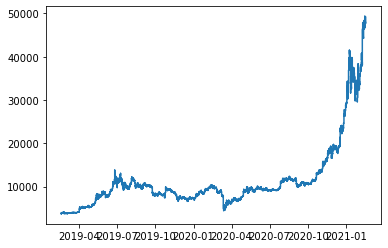

In [15]:
plt.plot(df1)

In [16]:
import numpy as np

In [17]:
df1

Date
2019-02-18     3707.719971
2019-02-18     3691.270020
2019-02-18     3720.399902
2019-02-18     3741.429932
2019-02-18     3724.129883
                  ...     
2021-02-16    47699.519531
2021-02-16    48184.082031
2021-02-16    48448.777344
2021-02-16    48970.917969
2021-02-16    49136.445312
Name: Close, Length: 17380, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(11297, 6083)

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(11196, 100)
(11196,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(5982, 100)
(5982,)


(None, None)

In [25]:
X_train.shape[1]

100

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.optimizers import Adam

In [28]:
opt = Adam(lr=0.0001)
#opt = Adam(lr=0.0025)

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

#model.compile(loss='mean_squared_error',optimizer='adam')
model.compile(optimizer=opt, loss='mean_squared_error')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=128,verbose=1)

Epoch 1/100
88/88 [==============================] - 9s 51ms/step - loss: 0.0043 - val_loss: 0.0170
Epoch 2/100
88/88 [==============================] - 2s 28ms/step - loss: 2.0432e-04 - val_loss: 3.9726e-04
Epoch 3/100
88/88 [==============================] - 2s 27ms/step - loss: 2.8601e-05 - val_loss: 5.0297e-04
Epoch 4/100
88/88 [==============================] - 2s 28ms/step - loss: 2.6711e-05 - val_loss: 6.1525e-04
Epoch 5/100
88/88 [==============================] - 2s 28ms/step - loss: 2.5369e-05 - val_loss: 8.0124e-04
Epoch 6/100
88/88 [==============================] - 2s 28ms/step - loss: 2.5047e-05 - val_loss: 8.9459e-04
Epoch 7/100
88/88 [==============================] - 2s 27ms/step - loss: 2.5143e-05 - val_loss: 0.0011
Epoch 8/100
88/88 [==============================] - 2s 27ms/step - loss: 2.4289e-05 - val_loss: 0.0012
Epoch 9/100
88/88 [==============================] - 2s 27ms/step - loss: 2.4557e-05 - val_loss: 0.0013
Epoch 10/100
88/88 [============================

88/88 [==============================] - 2s 27ms/step - loss: 9.7063e-06 - val_loss: 6.6328e-04ETA: 0s - loss: 9.7612
Epoch 77/100
88/88 [==============================] - 2s 27ms/step - loss: 9.3509e-06 - val_loss: 5.6575e-04
Epoch 78/100
88/88 [==============================] - 2s 27ms/step - loss: 9.5267e-06 - val_loss: 6.0844e-04
Epoch 79/100
88/88 [==============================] - 2s 26ms/step - loss: 8.4137e-06 - val_loss: 4.4077e-04 8.330
Epoch 80/100
88/88 [==============================] - 2s 28ms/step - loss: 9.1666e-06 - val_loss: 4.1363e-04
Epoch 81/100
88/88 [==============================] - 3s 29ms/step - loss: 8.4381e-06 - val_loss: 5.4605e-04
Epoch 82/100
88/88 [==============================] - 2s 28ms/step - loss: 8.6870e-06 - val_loss: 5.3160e-04
Epoch 83/100
88/88 [==============================] - 2s 28ms/step - loss: 8.5507e-06 - val_loss: 4.5082e-04A: 0s - loss: 8
Epoch 84/100
88/88 [==============================] - 2s 28ms/step - loss: 8.9114e-06 - val_loss: 

In [31]:
import tensorflow as tf
### Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
### Calculate RMSE performance metrics

In [32]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

8417.823180396459

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

19907.14559202304

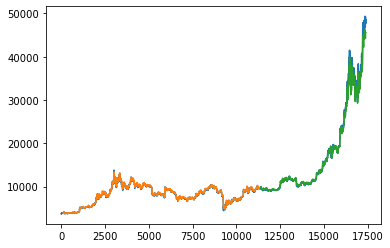

In [34]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)
tdl_int = len(test_data)
tdl_length = tdl_int - 100
print(tdl_int)
print(tdl_length)

6083
5983


In [36]:
x_input=test_data[tdl_length:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

temp_input

[0.9676814054589962,
 0.9689004199075828,
 0.978222048566739,
 0.9672612680066066,
 0.9609968406831102,
 0.9534117858626889,
 0.9544143166199077,
 0.9561186445670402,
 0.9567788727826338,
 0.9519657671798514,
 0.9548402703073873,
 0.9564464920538092,
 0.9614667582652414,
 0.9644657117171316,
 0.9688072746132723,
 0.9389820487356664,
 0.9504502958074086,
 0.9616775967872571,
 0.9647901378891417,
 0.9531864922858171,
 0.9550140730971381,
 0.9616300405121088,
 0.9670558180553364,
 0.9668367683778996,
 0.9597210324095267,
 0.9590793648264999,
 0.9643136342760996,
 0.9679406555848498,
 0.9661195752715708,
 0.9677437589204767,
 0.9682129922396561,
 0.9652297768356568,
 0.9545415039960687,
 0.958757590173428,
 0.954723346875503,
 0.9468869109531735,
 0.9368896581620088,
 0.9477401013211673,
 0.9482151508754368,
 0.9478940604853165,
 0.9515559792046073,
 0.9514589849311932,
 0.9438511783676253,
 0.9446978682375775,
 0.9453142180913885,
 0.946660762047612,
 0.9518414023883663,
 0.95073708751707

In [38]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0

#Ten Days
#while(i<10):

#Look 2.5 days into the future "(24*2.5)=60"
while(i<60):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9187081]
101
1 day input [0.96890042 0.97822205 0.96726127 0.96099684 0.95341179 0.95441432
 0.95611864 0.95677887 0.95196577 0.95484027 0.95644649 0.96146676
 0.96446571 0.96880727 0.93898205 0.9504503  0.9616776  0.96479014
 0.95318649 0.95501407 0.96163004 0.96705582 0.96683677 0.95972103
 0.95907936 0.96431363 0.96794066 0.96611958 0.96774376 0.96821299
 0.96522978 0.9545415  0.95875759 0.95472335 0.94688691 0.93688966
 0.9477401  0.94821515 0.94789406 0.95155598 0.95145898 0.94385118
 0.94469787 0.94531422 0.94666076 0.9518414  0.95073709 0.95074119
 0.96004306 0.95744432 0.95869216 0.95545867 0.95917268 0.9858302
 0.98562509 0.98513943 0.98401579 0.99421687 0.99354133 0.99241512
 1.         0.98674933 0.98736637 0.97878178 0.99128027 0.98506023
 0.98398585 0.98559823 0.98965891 0.98891853 0.993846   0.98610878
 0.98818013 0.97310804 0.94923838 0.95053497 0.94621633 0.94398512
 0.94893679 0.95527042 0.96303167 0.96007189 0.9655743  0.96709243
 0.96926128 0.96928498 0.96392788 0

9 day input [0.95196577 0.95484027 0.95644649 0.96146676 0.96446571 0.96880727
 0.93898205 0.9504503  0.9616776  0.96479014 0.95318649 0.95501407
 0.96163004 0.96705582 0.96683677 0.95972103 0.95907936 0.96431363
 0.96794066 0.96611958 0.96774376 0.96821299 0.96522978 0.9545415
 0.95875759 0.95472335 0.94688691 0.93688966 0.9477401  0.94821515
 0.94789406 0.95155598 0.95145898 0.94385118 0.94469787 0.94531422
 0.94666076 0.9518414  0.95073709 0.95074119 0.96004306 0.95744432
 0.95869216 0.95545867 0.95917268 0.9858302  0.98562509 0.98513943
 0.98401579 0.99421687 0.99354133 0.99241512 1.         0.98674933
 0.98736637 0.97878178 0.99128027 0.98506023 0.98398585 0.98559823
 0.98965891 0.98891853 0.993846   0.98610878 0.98818013 0.97310804
 0.94923838 0.95053497 0.94621633 0.94398512 0.94893679 0.95527042
 0.96303167 0.96007189 0.9655743  0.96709243 0.96926128 0.96928498
 0.96392788 0.96943799 0.98020692 0.98189894 0.98007469 0.98466943
 0.98245387 0.975832   0.96362287 0.97423305 0.9800

19 day output [[0.69292045]]
20 day input [0.95501407 0.96163004 0.96705582 0.96683677 0.95972103 0.95907936
 0.96431363 0.96794066 0.96611958 0.96774376 0.96821299 0.96522978
 0.9545415  0.95875759 0.95472335 0.94688691 0.93688966 0.9477401
 0.94821515 0.94789406 0.95155598 0.95145898 0.94385118 0.94469787
 0.94531422 0.94666076 0.9518414  0.95073709 0.95074119 0.96004306
 0.95744432 0.95869216 0.95545867 0.95917268 0.9858302  0.98562509
 0.98513943 0.98401579 0.99421687 0.99354133 0.99241512 1.
 0.98674933 0.98736637 0.97878178 0.99128027 0.98506023 0.98398585
 0.98559823 0.98965891 0.98891853 0.993846   0.98610878 0.98818013
 0.97310804 0.94923838 0.95053497 0.94621633 0.94398512 0.94893679
 0.95527042 0.96303167 0.96007189 0.9655743  0.96709243 0.96926128
 0.96928498 0.96392788 0.96943799 0.98020692 0.98189894 0.98007469
 0.98466943 0.98245387 0.975832   0.96362287 0.97423305 0.98002893
 0.99146194 0.99508639 0.91870809 0.91650158 0.91094714 0.90260649
 0.89199299 0.8798905  0.8668

30 day output [[0.5826127]]
31 day input [0.96522978 0.9545415  0.95875759 0.95472335 0.94688691 0.93688966
 0.9477401  0.94821515 0.94789406 0.95155598 0.95145898 0.94385118
 0.94469787 0.94531422 0.94666076 0.9518414  0.95073709 0.95074119
 0.96004306 0.95744432 0.95869216 0.95545867 0.95917268 0.9858302
 0.98562509 0.98513943 0.98401579 0.99421687 0.99354133 0.99241512
 1.         0.98674933 0.98736637 0.97878178 0.99128027 0.98506023
 0.98398585 0.98559823 0.98965891 0.98891853 0.993846   0.98610878
 0.98818013 0.97310804 0.94923838 0.95053497 0.94621633 0.94398512
 0.94893679 0.95527042 0.96303167 0.96007189 0.9655743  0.96709243
 0.96926128 0.96928498 0.96392788 0.96943799 0.98020692 0.98189894
 0.98007469 0.98466943 0.98245387 0.975832   0.96362287 0.97423305
 0.98002893 0.99146194 0.99508639 0.91870809 0.91650158 0.91094714
 0.90260649 0.89199299 0.8798905  0.86682785 0.85326475 0.83929914
 0.82523215 0.81123537 0.79729789 0.78350759 0.7698732  0.75649327
 0.74322325 0.73024589

42 day output [[0.5089495]]
43 day input [0.94469787 0.94531422 0.94666076 0.9518414  0.95073709 0.95074119
 0.96004306 0.95744432 0.95869216 0.95545867 0.95917268 0.9858302
 0.98562509 0.98513943 0.98401579 0.99421687 0.99354133 0.99241512
 1.         0.98674933 0.98736637 0.97878178 0.99128027 0.98506023
 0.98398585 0.98559823 0.98965891 0.98891853 0.993846   0.98610878
 0.98818013 0.97310804 0.94923838 0.95053497 0.94621633 0.94398512
 0.94893679 0.95527042 0.96303167 0.96007189 0.9655743  0.96709243
 0.96926128 0.96928498 0.96392788 0.96943799 0.98020692 0.98189894
 0.98007469 0.98466943 0.98245387 0.975832   0.96362287 0.97423305
 0.98002893 0.99146194 0.99508639 0.91870809 0.91650158 0.91094714
 0.90260649 0.89199299 0.8798905  0.86682785 0.85326475 0.83929914
 0.82523215 0.81123537 0.79729789 0.78350759 0.7698732  0.75649327
 0.74322325 0.73024589 0.71748883 0.70509493 0.69292045 0.68112475
 0.66965687 0.65851992 0.64772069 0.63731277 0.62727922 0.61761528
 0.60830891 0.59939039

52 day output [[0.47262713]]
53 day input [0.95917268 0.9858302  0.98562509 0.98513943 0.98401579 0.99421687
 0.99354133 0.99241512 1.         0.98674933 0.98736637 0.97878178
 0.99128027 0.98506023 0.98398585 0.98559823 0.98965891 0.98891853
 0.993846   0.98610878 0.98818013 0.97310804 0.94923838 0.95053497
 0.94621633 0.94398512 0.94893679 0.95527042 0.96303167 0.96007189
 0.9655743  0.96709243 0.96926128 0.96928498 0.96392788 0.96943799
 0.98020692 0.98189894 0.98007469 0.98466943 0.98245387 0.975832
 0.96362287 0.97423305 0.98002893 0.99146194 0.99508639 0.91870809
 0.91650158 0.91094714 0.90260649 0.89199299 0.8798905  0.86682785
 0.85326475 0.83929914 0.82523215 0.81123537 0.79729789 0.78350759
 0.7698732  0.75649327 0.74322325 0.73024589 0.71748883 0.70509493
 0.69292045 0.68112475 0.66965687 0.65851992 0.64772069 0.63731277
 0.62727922 0.61761528 0.60830891 0.59939039 0.5908345  0.58261269
 0.57477343 0.56724465 0.56006283 0.5531854  0.5466404  0.5404287
 0.53455848 0.52893591 

In [39]:
day_new=np.arange(1,101)

#Ten Days
#day_pred=np.arange(101,111)

#Look 2.5 days into the future "((24*2.5)=60)+101 = 161"
day_pred=np.arange(101,161)

In [40]:
import matplotlib.pyplot as plt

In [41]:
len(df1)
df2_int = len(df1)
df2_length = df2_int - 100
print(df2_int)
print(df2_length)

17380
17280


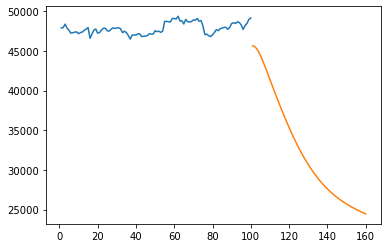

In [42]:
#plt.plot(day_new,scaler.inverse_transform(df1[2205:]))

plt.plot(day_new,scaler.inverse_transform(df1[df2_length:]))

plt.plot(day_pred,scaler.inverse_transform(lst_output))

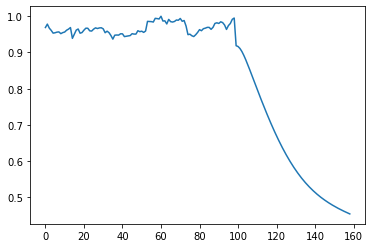

In [43]:
df3=df1.tolist()
df3.extend(lst_output)
#plt.plot(df3[2206:])

df3_length = df2_length + 1

plt.plot(df3[df3_length:])

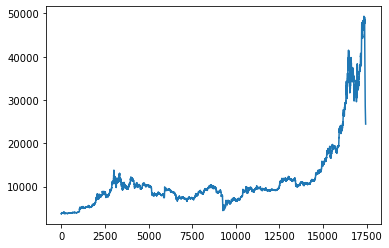

In [44]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)